In [62]:
import requests
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2
%matplotlib inline

In [63]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [64]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

In [65]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    squad_market_value = team['squadMarketValue']
    if squad_market_value == None:
        squad_market_value = random.randint(100000, 1000000)
    loss_count =  0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            if f['result']['goalsHomeTeam'] and f['result']['goalsAwayTeam']:
                if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam']:
                   loss_count += 1 
    team['squadMarketValue'] = squad_market_value
    team['loossCount'] = loss_count

In [66]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'Name': team['name'], 
                        'Squad market value': team['squadMarketValue'], 'Loss count': team['loossCount']})

In [67]:
teams_pd = pd.DataFrame(team_for_pd)

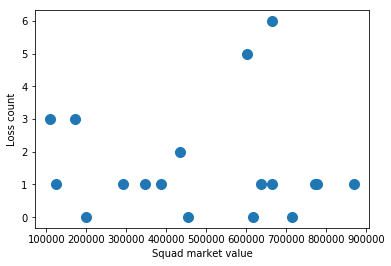

In [68]:
teams_pd.plot.scatter(x='Squad market value', y='Loss count', s=100)

In [69]:
del teams_pd['Name']

In [70]:
whitened = whiten(teams_pd.as_matrix())

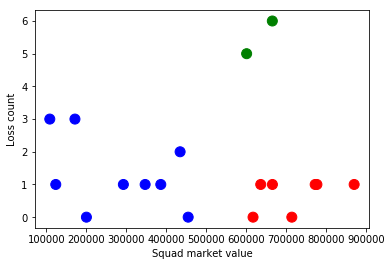

In [71]:
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='Squad market value', y='Loss count', c=colors, s=100)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/cluster/vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


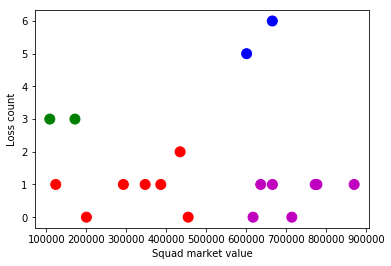

In [72]:
centroids, cluster_map = kmeans2(whitened, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='Squad market value', y='Loss count', c=colors, s=100)